# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [17]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale
from skimage import morphology
from skimage import filters
from skimage.measure import label
from skimage.measure import regionprops
from skimage.draw import circle_perimeter

Pretty printing has been turned OFF


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

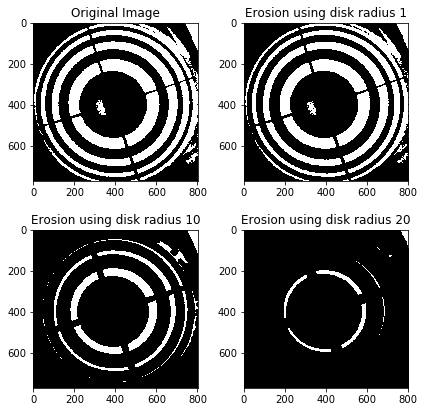

In [26]:
import numpy as np
from skimage.morphology import square

Path = './images/'
FC = 'FindingContours.png'
FC_m = io.imread(Path.__add__(FC))

disk_1 = morphology.disk(1);
disk_10 = morphology.disk(10);
disk_20 = morphology.disk(20);

FCerosion_1 = morphology.erosion(FC_m,disk_1)
FCerosion_10 = morphology.erosion(FC_m,disk_10)
FCerosion_20 = morphology.erosion(FC_m,disk_20)


fig = plt.figure(figsize=(6, 6))

plt.subplot(221)
io.imshow(FC_m)
plt.title("Original Image")

plt.subplot(222)
io.imshow(FCerosion_1)
plt.title("Erosion using disk radius 1")

plt.subplot(223)
io.imshow(FCerosion_10)
plt.title("Erosion using disk radius 10")

plt.subplot(224)
io.imshow(FCerosion_20)
plt.title("Erosion using disk radius 20")



** Q.1.2 Dilation **

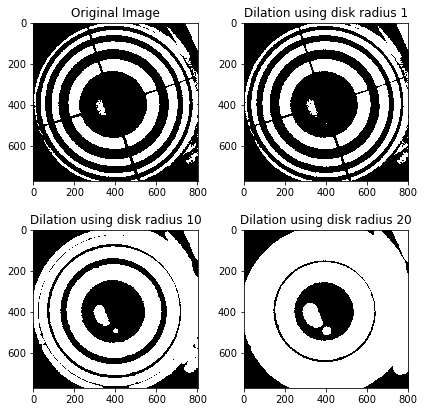

In [28]:
FCdilation1 = morphology.dilation(FC_m,disk_1)
FCdilation10 = morphology.dilation(FC_m,disk_10)
FCdilation20 = morphology.dilation(FC_m,disk_20)

fig = plt.figure(figsize=(6, 6))

plt.subplot(221)
io.imshow(FC_m)
plt.title("Original Image")

plt.subplot(222)
io.imshow(FCdilation1 )
plt.title("Dilation using disk radius 1")

plt.subplot(223)
io.imshow(FCdilation10)
plt.title("Dilation using disk radius 10")

plt.subplot(224)
io.imshow(FCdilation20)
plt.title("Dilation using disk radius 20");

** Q.1.3 Opening **

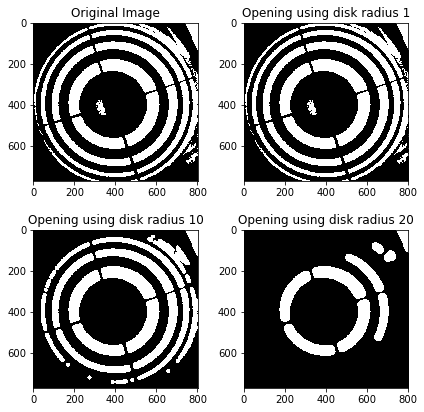

In [32]:
#erosion
OFCerosion_1 = morphology.erosion(FC_m,disk_1)
OFCerosion_10 = morphology.erosion(FC_m,disk_10)
OFCerosion_20 = morphology.erosion(FC_m,disk_20)
#dilation
OpeningFCdilation1 = morphology.dilation(OFCerosion_1,disk_1)
OpeningFCdilation10 = morphology.dilation(OFCerosion_10,disk_10)
OpeningFCdilation20 = morphology.dilation(OFCerosion_20,disk_20)

#opening done

fig = plt.figure(figsize=(6, 6))

plt.subplot(221)
io.imshow(FC_m)
plt.title("Original Image")

plt.subplot(222)
io.imshow(OpeningFCdilation1 )
plt.title("Opening disk radius 1")

plt.subplot(223)
io.imshow(OpeningFCdilation10)
plt.title("Opening disk radius 10")

plt.subplot(224)
io.imshow(OpeningFCdilation20)
plt.title("Opening disk radius 20");




** Q.1.4 Closing**

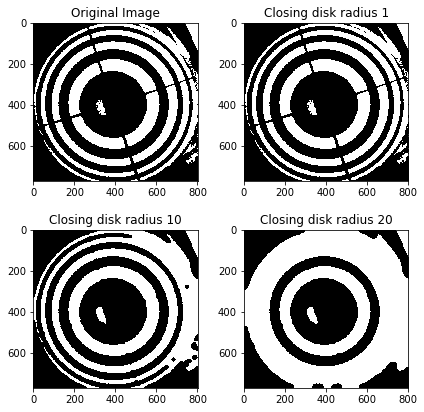

In [36]:
CLFCdilation_1 = morphology.dilation(FC_m,disk_1)
CLFCdilation_10 = morphology.dilation(FC_m,disk_10)
CLFCdilation_20 = morphology.dilation(FC_m,disk_20)
#done dilation
ClosingFCerosion_1 = morphology.erosion(CLFCdilation_1,disk_1)
ClosingFCerosion_10 = morphology.erosion(CLFCdilation_10,disk_10)
ClosingFCerosion_20 = morphology.erosion(CLFCdilation_20,disk_20)

fig = plt.figure(figsize=(6, 6))

plt.subplot(221)
io.imshow(FC_m)
plt.title("Original Image")

plt.subplot(222)
io.imshow(ClosingFCerosion_1)
plt.title("Closing disk radius 1")

plt.subplot(223)
io.imshow(ClosingFCerosion_10)
plt.title("Closing disk radius 10")

plt.subplot(224)
io.imshow(ClosingFCerosion_20)
plt.title("Closing disk radius 20");





** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

/opt/anaconda/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/anaconda/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


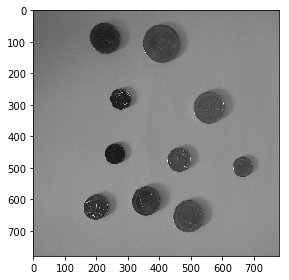

In [49]:
Path = './images/'
Coins = 'coins.jpg'
Coins_m = img_as_ubyte(rescale(io.imread(Path.__add__(Coins),as_grey = True),0.25))

io.imshow(Coins_m)


**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

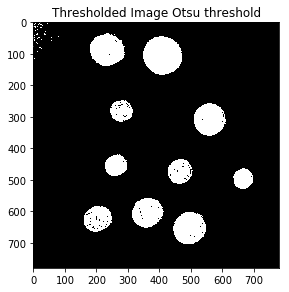

In [57]:
otsu_threshold = filters.threshold_otsu(Coins_m)
Coins_Otsu = Coins_m < otsu_threshold

io.imshow(Coins_Otsu);
plt.title("Thresholded Image Otsu threshold");

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

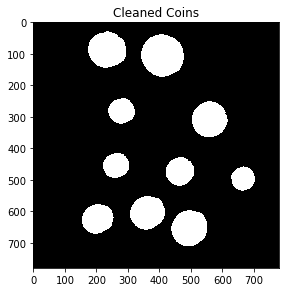

In [72]:
cleanCoins = morphology.dilation(morphology.erosion(morphology.dilation(Coins_Otsu,morphology.disk(1)),morphology.disk(5)),morphology.disk(10))

io.imshow(cleanCoins);
plt.title("Cleaned Coins");

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


The number of Circles are 10
The radius of the Circle is 67 pixels.
The radius of the Circle is 40 pixels.
The radius of the Circle is 56 pixels.
The radius of the Circle is 40 pixels.
The radius of the Circle is 44 pixels.
The radius of the Circle is 37 pixels.
The radius of the Circle is 54 pixels.
The radius of the Circle is 48 pixels.
The radius of the Circle is 57 pixels.


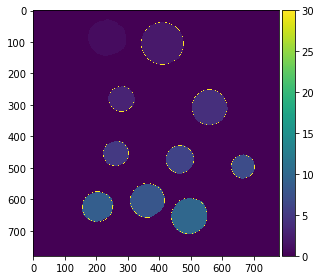

In [90]:
from skimage.draw import circle_perimeter

CoinsLabel = label(cleanCoins, return_num=False)
Circles = regionprops(CoinsLabel)

print('The number of Circles are {}'.format(len(Circles)))

for i in range (1,len(Circles)):
    radius = int(Circles[i].equivalent_diameter / 2.0)
    circle = circle_perimeter(int(Circles[i].centroid[0]),int(Circles[i].centroid[1]),radius)
    CoinsLabel[circle[0],circle[1]] = 30
    print('The radius of the Circle is {} pixels.'.format(radius))
    
io.imshow(CoinsLabel)


# from skimage.draw import circle_perimeter

# LabelCoins = label(cleanCoins, background=True)
# Circles = regionprops(LabelCoins)

# print('The number of Circles are {}'.format(len(Circles)))

# for i in range (1,len(Circles)):
#     radius = int(Circles[i].equivalent_diameter / 2.0)
        
#     circle = circle_perimeter(int(Circles[i].centroid[0]),int(Circles[i].centroid[1]),radius)
#     LabelCoins[circle[0],circle[1]] = 30
   
#     print('The radius of the Circle is {} pixels.'.format(Circles))
    
# plt.figure()    
# io.imshow(LabelCoins)

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 